In [ ]:
from google import colab
colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install transformers torch pandas seqeval


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=dc11d4bccf8bcd07a10be301c5ce2f04eb290f8e3e80d8b4a8e97bb1d032b45f
  Stored in directory: /root/.cache/pip/wheels/5f/b8/73/0b2c1a76b701a677653dd79ece07cfabd7457989dbfbdcd8d7
Successfully built seqeval


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/ner_final.csv")

df.head()


,Standard_Nepali (Source),Entities (Nepali)
0,प्रधानमन्त्री केपी शर्मा ओलीले सिंहदरबारमा नया...,"केपी शर्मा ओली (PER), सिंहदरबार (LOC)"
1,नेपाल सरकारले आर्थिक वर्ष २०२६/२७ का लागि बजेट...,"नेपाल (LOC), २०२६/२७ (DATE)"
2,काठमाडौँ महानगरपालिकाले दरबारमार्ग क्षेत्रमा स...,"काठमाडौँ महानगरपालिका (ORG), दरबारमार्ग (LOC)"
3,नेपाली कांग्रेसले बुटवलमा आयोजना गरेको कार्यक्...,"नेपाली कांग्रेस (ORG), बुटवल (LOC)"
4,गृहमन्त्री रवि लामिछानेले चितवनमा सुरक्षा अवस्...,"रवि लामिछाने (PER), चितवन (LOC)"


In [ ]:
def convert_to_bio(sentence, entity_string):
    tokens = sentence.split()
    bio_labels = ["O"] * len(tokens)

    if pd.isna(entity_string):
        return tokens, bio_labels

    entities = entity_string.split(",")

    for entity in entities:
        entity = entity.strip()
        if "(" not in entity:
            continue

        name, label = entity.split("(")
        name = name.strip()
        label = label.replace(")", "").strip()

        name_tokens = name.split()
        n = len(name_tokens)

        for i in range(len(tokens)):
            match = True

            # Check each token in entity
            for j in range(n):
                if i + j >= len(tokens):
                    match = False
                    break

                # Allow suffix for the last token
                if j == n - 1:
                    if not tokens[i + j].startswith(name_tokens[j]):
                        match = False
                        break
                else:
                    if tokens[i + j] != name_tokens[j]:
                        match = False
                        break

            if match:
                bio_labels[i] = "B-" + label
                for j in range(1, n):
                    bio_labels[i + j] = "I-" + label

    return tokens, bio_labels


| Label | Meaning                                         |
| ----- | ----------------------------------------------- |
| B-PER | Beginning of a Person entity                    |
| I-PER | Inside a Person entity (after the first token)  |
| B-LOC | Beginning of a Location entity                  |
| I-LOC | Inside a Location entity                        |
| O     | Outside any entity (not part of a named entity) |


In [ ]:
sentences = []
true_labels = []

for _, row in df.iterrows():
    tokens, labels = convert_to_bio(row["Standard_Nepali (Source)"], row["Entities (Nepali)"])
    sentences.append(tokens)
    true_labels.append(labels)

print(sentences[1])
print(true_labels[1])



['नेपाल', 'सरकारले', 'आर्थिक', 'वर्ष', '२०२६/२७', 'का', 'लागि', 'बजेट', 'प्रस्तुत', 'गरेको', 'छ।']
['B-LOC', 'O', 'O', 'O', 'B-DATE', 'O', 'O', 'O', 'O', 'O', 'O']


In [ ]:
import pandas as pd

# Convert tokens and labels to space-joined strings
df_save = pd.DataFrame({
    "tokens": [" ".join(tokens) for tokens in sentences],
    "labels": [" ".join(labels) for labels in true_labels]
})

df_save.to_csv("/content/drive/MyDrive/Colab Notebooks/dataset/ner_conv_final.csv", index=False)
print("Saved tokenized BIO data to ner_conv_final.csv")


Saved tokenized BIO data to ner_conv_final.csv


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/ner_converted.csv")

df.head()

,tokens,labels
0,प्रधानमन्त्री केपी शर्मा ओलीले सिंहदरबारमा नया...,O B-PER I-PER I-PER B-LOC O O O O O O
1,नेपाल सरकारले आर्थिक वर्ष २०२६/२७ का लागि बजेट...,B-LOC O O O B-DATE O O O O O O
2,काठमाडौँ महानगरपालिकाले दरबारमार्ग क्षेत्रमा स...,B-ORG I-ORG B-LOC O O O O O O O
3,नेपाली कांग्रेसले बुटवलमा आयोजना गरेको कार्यक्...,B-ORG I-ORG B-LOC O O O O O O O O O
4,गृहमन्त्री रवि लामिछानेले चितवनमा सुरक्षा अवस्...,O B-PER I-PER B-LOC O O O O O


In [ ]:
df.head()

,tokens,labels
0,प्रधानमन्त्री केपी शर्मा ओलीले सिंहदरबारमा नया...,O B-PER I-PER I-PER B-LOC O O O O O O
1,नेपाल सरकारले आर्थिक वर्ष २०२६/२७ का लागि बजेट...,B-LOC O O O B-DATE O O O O O O
2,काठमाडौँ महानगरपालिकाले दरबारमार्ग क्षेत्रमा स...,B-ORG I-ORG B-LOC O O O O O O O
3,नेपाली कांग्रेसले बुटवलमा आयोजना गरेको कार्यक्...,B-ORG I-ORG B-LOC O O O O O O O O O
4,गृहमन्त्री रवि लामिछानेले चितवनमा सुरक्षा अवस्...,O B-PER I-PER B-LOC O O O O O


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForTokenClassification

# Nepali NER model
model_name = "SynapseHQ/Finetuned-NER-NepBertA"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)
model.eval()  # evaluation mode


Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, el

In [ ]:
def predict_ner(tokens):
    encoding = tokenizer(tokens,
                         is_split_into_words=True,
                         return_tensors="pt",
                         truncation=True)

    with torch.no_grad():
        outputs = model(**encoding)

    predictions = torch.argmax(outputs.logits, dim=2)
    predicted_labels = []

    word_ids = encoding.word_ids()
    previous_word_idx = None

    for idx, word_idx in enumerate(word_ids):
        if word_idx is None:
            continue
        if word_idx != previous_word_idx:
            label_id = predictions[0][idx].item()
            label = model.config.id2label[label_id]
            predicted_labels.append(label)
        previous_word_idx = word_idx

    return predicted_labels


In [ ]:
from seqeval.metrics import classification_report, f1_score, precision_score, recall_score

all_pred = []
all_true = []

for tokens, labels in zip(sentences, true_labels):
    preds = predict_ner(tokens)

    # Ensure lengths match
    min_len = min(len(preds), len(labels))
    all_pred.append(preds[:min_len])
    all_true.append(labels[:min_len])

# Metrics
print("Precision:", precision_score(all_true, all_pred))
print("Recall:", recall_score(all_true, all_pred))
print("F1 Score:", f1_score(all_true, all_pred))
print("Accuracy:", accuracy_score(all_true, all_pred))

print("\nDetailed Report:\n")
print(classification_report(all_true, all_pred))


Precision: 0.6850715746421268
Recall: 0.6046931407942239
F1 Score: 0.6423777564717162

Detailed Report:

              precision    recall  f1-score   support

        DATE       0.00      0.00      0.00         8
         LOC       0.78      0.54      0.64       337
        MISC       0.00      0.00      0.00         3
         ORG       0.55      0.79      0.65        89
         PER       0.65      0.70      0.67       117

   micro avg       0.69      0.60      0.64       554
   macro avg       0.40      0.41      0.39       554
weighted avg       0.70      0.60      0.64       554



/usr/local/lib/python3.12/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten token lists
flat_true = [label for seq in all_true for label in seq]
flat_pred = [label for seq in all_pred for label in seq]

# Optional: see unique labels
labels = list(set(flat_true + flat_pred))
labels.sort()  # for consistent ordering
print("Labels:", labels)


Labels: ['B-DATE', 'B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-DATE', 'I-LOC', 'I-MISC', 'I-ORG', 'I-PER', 'O']


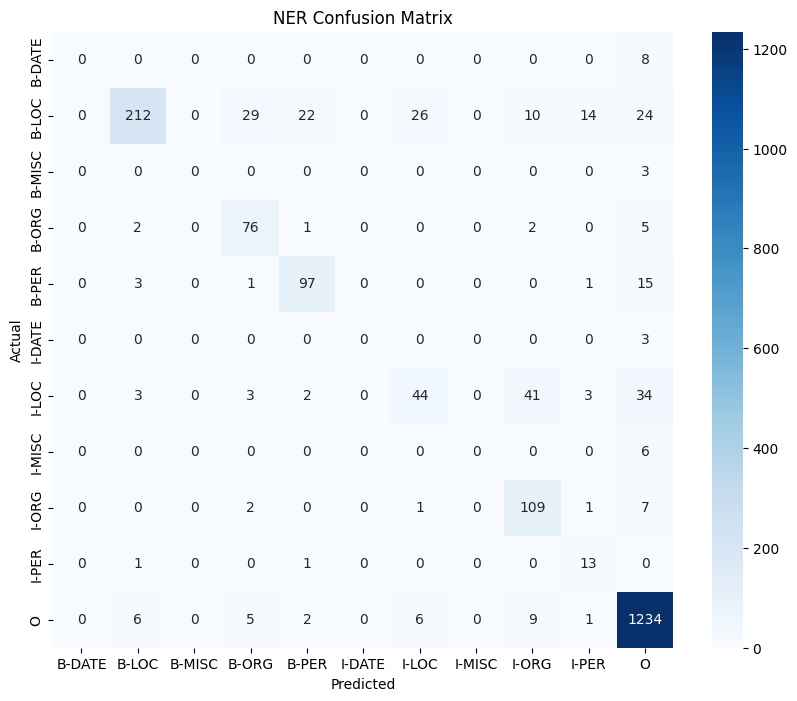

In [ ]:
cm = confusion_matrix(flat_true, flat_pred, labels=labels)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("NER Confusion Matrix")
plt.show()


In [ ]:
# Overall accuracy
accuracy = accuracy_score(flat_true, flat_pred)
print("Overall Accuracy:", accuracy)

# Per-class precision, recall, F1
print("\nClassification Report:\n")
print(classification_report(flat_true, flat_pred, labels=labels))


Overall Accuracy: 0.8548850574712644

Classification Report:

              precision    recall  f1-score   support

      B-DATE       0.00      0.00      0.00         8
       B-LOC       0.93      0.63      0.75       337
      B-MISC       0.00      0.00      0.00         3
       B-ORG       0.66      0.88      0.75        86
       B-PER       0.78      0.83      0.80       117
      I-DATE       0.00      0.00      0.00         3
       I-LOC       0.57      0.34      0.43       130
      I-MISC       0.00      0.00      0.00         6
       I-ORG       0.64      0.91      0.75       120
       I-PER       0.39      0.87      0.54        15
           O       0.92      0.98      0.95      1263

    accuracy                           0.85      2088
   macro avg       0.44      0.49      0.45      2088
weighted avg       0.85      0.85      0.84      2088



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
